https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf

### Импортирование библиотек

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import sklearn as skl
warnings.filterwarnings('ignore')

### Загрузка данных

In [2]:
# Load the data
df_train =pd.read_csv('train.csv', index_col='Id')
df_test = pd.read_csv('test.csv', index_col='Id')

### Исследовательский анализ данных (EDA)

In [3]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
# общая информация
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Подготовка данных

In [6]:
# Проверка наличие пропущенных значений
missing_percent = df_train.isnull().sum() / len(df_train)
missing_columns = missing_percent[missing_percent > 0.7].index

In [7]:
# создаем новый датасет и Убираем столбцы с пропущенными значениями свыше 70%
df_train_new = df_train.copy()
df_train_new.drop(missing_columns, axis=1, inplace=True)

In [8]:
df_train.GarageYrBlt.value_counts().sort_index()

GarageYrBlt
1900.0     1
1906.0     1
1908.0     1
1910.0     3
1914.0     2
          ..
2006.0    59
2007.0    49
2008.0    29
2009.0    21
2010.0     3
Name: count, Length: 97, dtype: int64

In [9]:
# вычисляем чисовые и категориальные характеристики
# проверяем по отдельности каждый признак и сортируем по числовым и катенгориальными признаками
numeric_columns = df_train_new.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df_train_new.select_dtypes(include=['object']).columns.tolist()
print('Числовые признаки',numeric_columns)
print('Категориальные признаки', categorical_columns)

Числовые признаки ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Категориальные признаки ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageT

In [10]:
# Числовые признаки (собираем вручую)
num_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
            'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal', 'YrSold', 'SalePrice'
]

# Категориальные признаки (разница всех признаков и числовых)
cat_cols = df_train_new.columns.difference(num_cols).tolist()

feature_cols = num_cols + cat_cols

In [11]:
# получаем список столбцов где есть пропущенные значения после удаления не релевантных столбцов
df_train_new.columns[df_train_new.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [12]:
# LotFrontage - Линейные футы улицы, примыкающие к земельному участку 
# df_train_new.LotFrontage.value_counts(dropna=False)
med = df_train_new.LotFrontage.median()
df_train_new.LotFrontage.fillna(med, inplace=True)

In [13]:
# MasVnrType - Тип облицовки кирпичной кладкой
marker = 'no_info'
df_train_new.MasVnrType.fillna(marker, inplace=True)

In [14]:
# MasVnrArea Площадь облицовки из кирпича в квадратных футах
df_train_new.MasVnrArea.fillna(marker, inplace=True)

In [15]:
# BsmtQual Оценивает высоту подвала
df_train_new.BsmtQual.fillna(marker, inplace=True)

In [16]:
# BsmtCond Оценивает общее состояние подвала
df_train_new.BsmtCond.fillna(marker, inplace=True)

In [17]:
# BsmtExposure Относится к наличию выхода или садового уровня стен
df_train_new.BsmtExposure.fillna(marker, inplace=True)

In [18]:
# BsmtFinType1 Оценка готовой площади подвала
df_train_new.BsmtFinType1.fillna(marker, inplace=True)

In [19]:
# BsmtFinType2 Оценка завершенной площади подвала (если есть несколько типов)
df_train_new.BsmtFinType2.fillna(marker, inplace=True)

In [20]:
# Electrical электрическая система
df_train_new.Electrical.fillna(marker, inplace=True)

In [21]:
# FireplaceQu Качество камина
df_train_new.FireplaceQu.fillna(marker, inplace=True)

In [22]:
# GarageType Расположение гаража
df_train_new.GarageType.fillna(marker, inplace=True)

In [23]:
# GarageYrBlt Год постройки гаража
df_train_new.GarageYrBlt.fillna(0, inplace=True)

In [24]:
# GarageFinish Внутренняя отделка гаража
df_train_new.GarageFinish.fillna(marker, inplace=True)

In [25]:
# GarageQual Качество гаража
df_train_new.GarageQual.fillna(marker, inplace=True)

In [26]:
# GarageCond Состояние гаража
df_train_new.GarageCond.fillna(marker, inplace=True)

### Распределение цен на дома

In [27]:
df_train_new['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

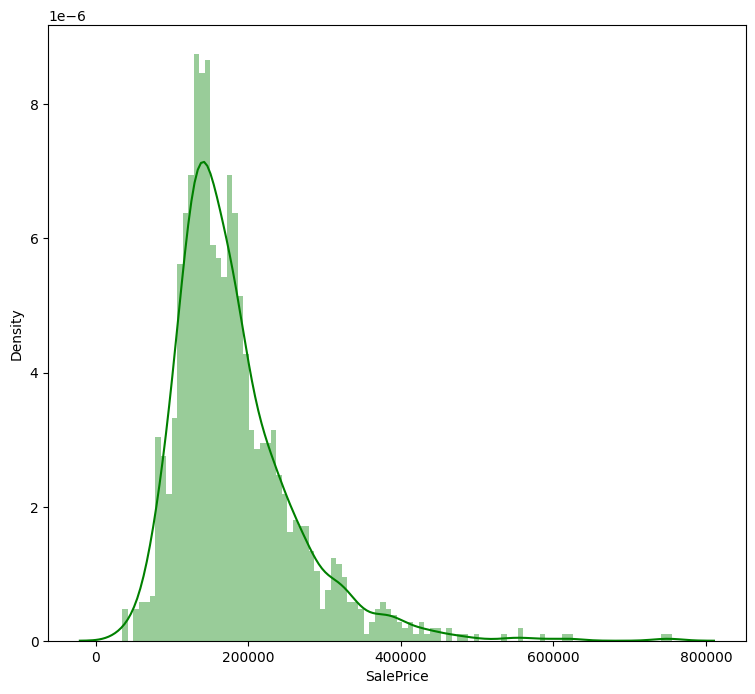

In [28]:
plt.figure(figsize=(9, 8))
sns.distplot(df_train_new['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Распределение числовых данных

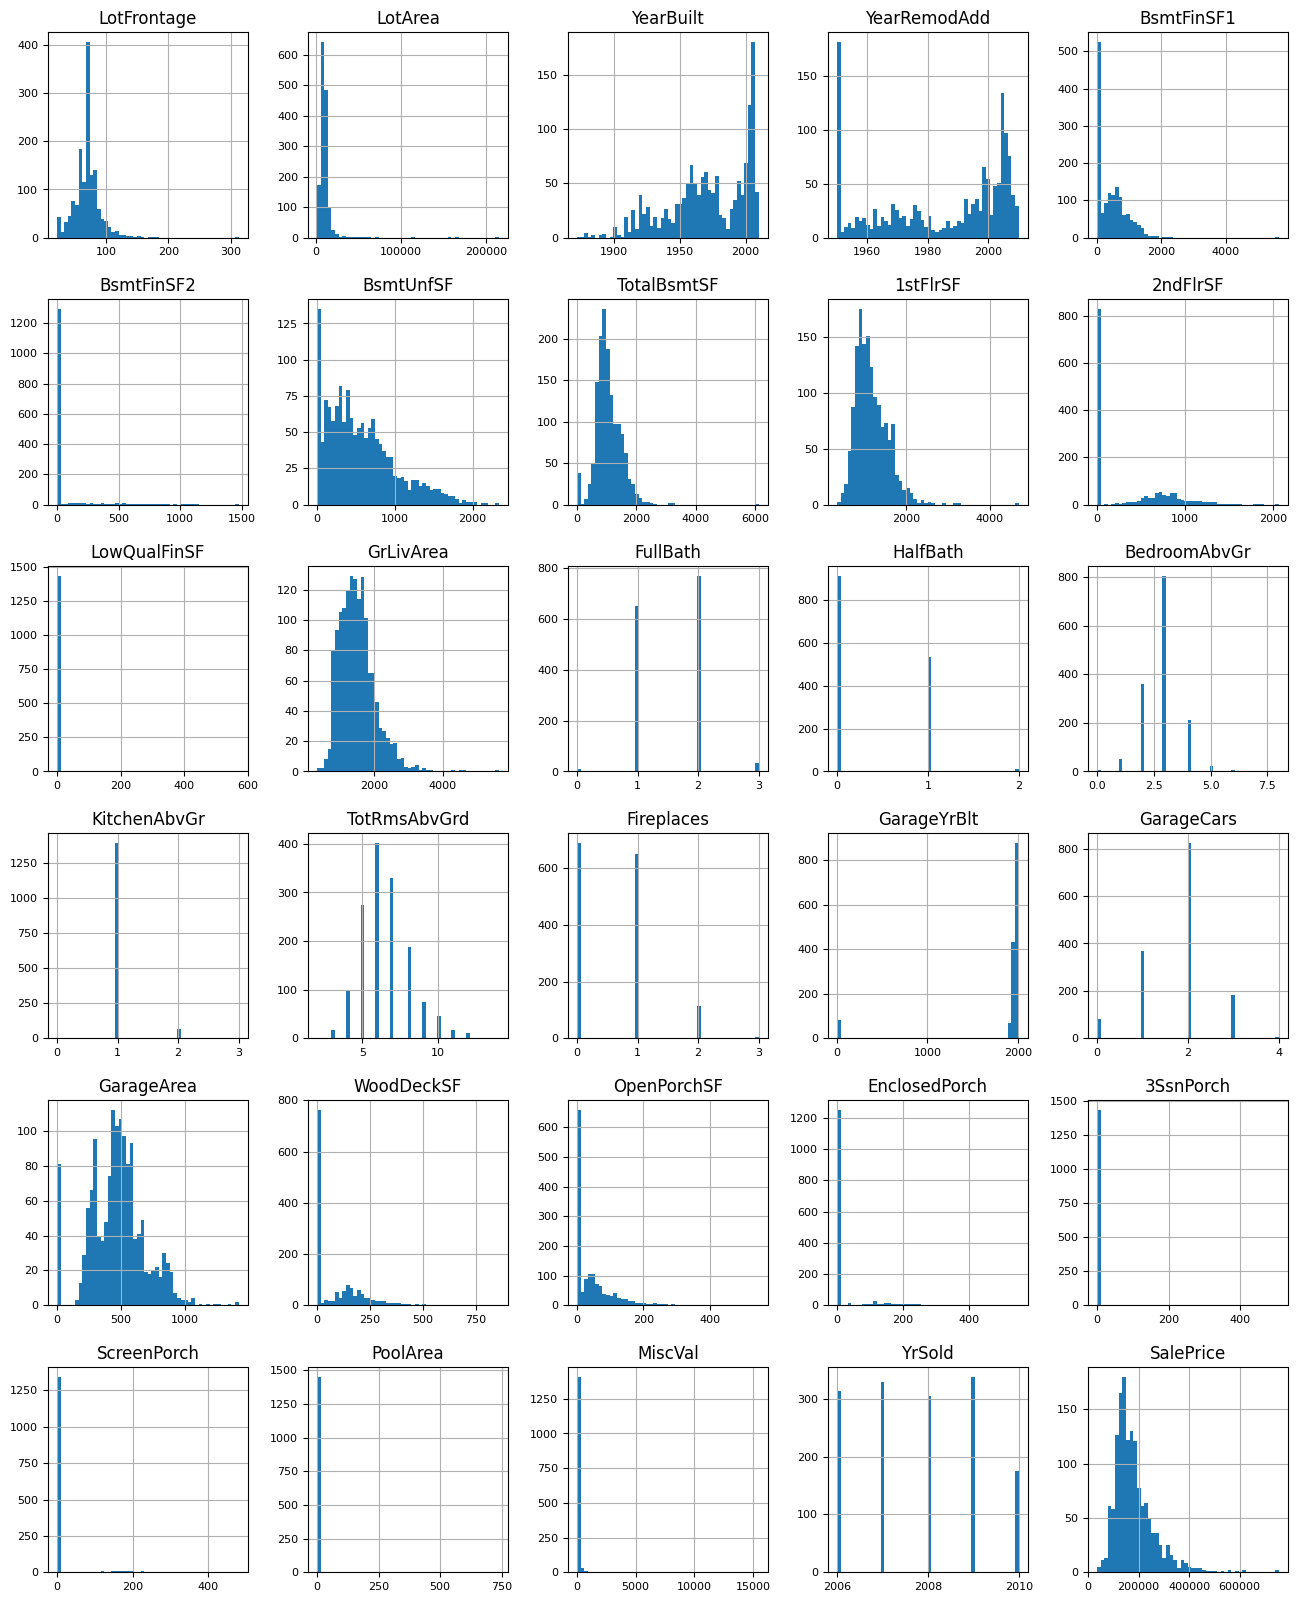

In [29]:
df_num = df_train_new[num_cols]
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Разделение датасета на тренеровочные и тестовие части

In [30]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
    '''
    на вход подается датасет
    возвращает тренировочную 70% и тестовые 30% части датасета
    '''
    np.random.seed(50)  # Установка seed на значение 50
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df_train_new)
print(f'{len(train_ds_pd)} примеров в тренировочной части, {len(valid_ds_pd)} примеров в тестовой части латасета.')


1027 примеров в тренировочной части, 433 примеров в тестовой части латасета.


### Преобразование pd.df_train_new на tf.df_train_new

In [31]:
# По умолчанию модель случайного леса настроена на обучение задач классификации. 
# Поскольку это задача регрессии, мы укажем тип задачи (tfdf.keras.Task.REGRESSION) в качестве параметра здесь.
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_decision_forests as tfdf

label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

### Выбор модели

In [ ]:
# Линейная регрессия (Linear Regression)


### Обучение модели

### Настройка модели

### Оценка модели